# 신용 카드 사용정보 분석하기

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

## 1. 회원정보 파악하기

In [2]:
# 신용 카드 회원정보를 UCI_Member에 불러오세요




,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,1,20000,Female,University,Married,24
1,2,120000,Female,University,Single,26
2,3,90000,Female,University,Single,34
3,4,50000,Female,University,Married,37
4,5,50000,Male,University,Married,57


In [3]:
# UCI_Member의 컬럼 정보를 확인해보세요

 

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], dtype='object')

In [4]:
# UCI_Member의 컬럼 정보를 ID, 사용한도, 성별, 교육, 결혼, 나이 으로 바꾸세요

 
    
UCI_Member

,ID,월별사용한도,성별,교육,결혼,나이
0,1,20000,Female,University,Married,24
1,2,120000,Female,University,Single,26
2,3,90000,Female,University,Single,34
3,4,50000,Female,University,Married,37
4,5,50000,Male,University,Married,57
5,6,50000,Male,Graduate School,Single,37
6,7,500000,Male,Graduate School,Single,29
7,8,100000,Female,University,Single,23
8,9,140000,Female,High School,Married,28
9,10,20000,Male,High School,Single,35


In [5]:
# 회원들의 교육 column에 어떤 값들이 들어가있는지 확인해 보세요.




array(['University', 'Graduate School', 'High School', 'Unknown',
       'Others'], dtype=object)

In [6]:
# 회원들의 정보를 사용한도 순으로 정렬해서 내림차순으로 10개만 출력해보세요.





,ID,월별사용한도,성별,교육,결혼,나이
2197,2198,1000000,Female,Graduate School,Married,47
14919,14920,800000,Male,University,Married,53
18006,18007,800000,Male,Graduate School,Single,46
24320,24321,780000,Male,Graduate School,Married,48
28715,28716,780000,Female,University,Single,41
21375,21376,760000,Male,High School,Married,54
13186,13187,750000,Female,Graduate School,Single,28
3733,3734,750000,Female,University,Married,43
10089,10090,750000,Female,Graduate School,Married,41
4603,4604,750000,Female,High School,Married,40


## 2. 사용정보 파악하기

In [7]:
# 신용 카드 사용정보를 UCI_Usage에 불러오세요




UCI_Usage.head()

,ID,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,3913.0,3102.0,689.0,0.0,NaN,0.0,NaN,689.0,0.0,0.0,0.0,0.0
1,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1000.0,1000.0,1000.0,0.0,2000.0
2,3,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [8]:
# UCI_Usage의 컬럼 정보를 ID, 1월~6월까지 월별 사용요금, 월별 지불요금으로 아래와 같이 바꿔주세요.







UCI_Usage

,ID,1월사용요금,2월사용요금,3월사용요금,4월사용요금,5월사용요금,6월사용요금,1월지불요금,2월지불요금,3월지불요금,4월지불요금,5월지불요금,6월지불요금
0,1,3913.0,3102.0,689.0,0.0,NaN,0.0,NaN,689.0,0.0,0.0,0.0,0.0
1,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1000.0,1000.0,1000.0,0.0,2000.0
2,3,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
5,6,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
6,7,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0
7,8,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0
8,9,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0
9,10,0.0,0.0,0.0,0.0,13007.0,13912.0,NaN,0.0,0.0,13007.0,1122.0,0.0


In [9]:
# 각 회원마다 사용 정보에 누락 데이터가 있는지 갯수를 세어보세요.




0        2
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        1
10       0
11       0
12       0
13       0
14       0
15       1
16       0
17       0
18       2
19       2
20       0
21       0
22       0
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    2
29974    1
29975    0
29976    0
29977    0
29978    0
29979    2
29980    0
29981    0
29982    0
29983    0
29984    0
29985    2
29986    2
29987    0
29988    0
29989    1
29990    0
29991    1
29992    1
29993    0
29994    0
29995    0
29996    0
29997    1
29998    0
29999    0
Length: 30000, dtype: int64

In [10]:
# 회원들의 사용 정보에 있는 누락 데이터를 0으로 바꿔주세요.



UCI_Usage

,ID,1월사용요금,2월사용요금,3월사용요금,4월사용요금,5월사용요금,6월사용요금,1월지불요금,2월지불요금,3월지불요금,4월지불요금,5월지불요금,6월지불요금
0,1,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
5,6,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
6,7,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0
7,8,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0
8,9,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0
9,10,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0


In [11]:
# UCI_Usage에 '상반기사용요금', '상반기지불요금' 컬럼을 추가해보세요.



UCI_Usage

,ID,1월사용요금,2월사용요금,3월사용요금,4월사용요금,5월사용요금,6월사용요금,1월지불요금,2월지불요금,3월지불요금,4월지불요금,5월지불요금,6월지불요금,상반기사용요금,상반기지불요금
0,1,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,7704.0,689.0
1,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,17077.0,5000.0
2,3,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,101653.0,11018.0
3,4,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,231334.0,8388.0
4,5,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,109339.0,59049.0
5,6,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,238114.0,7772.0
6,7,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,2724595.0,180759.0
7,8,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,13486.0,4791.0
8,9,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,65212.0,6761.0
9,10,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,26919.0,14129.0


In [12]:
# UCI_Usage에 상반기에 요금을 지불하고 난 후의 잔여대금을 기록한 '상반기잔여대금' 컬럼을 추가해보세요.



UCI_Usage

,ID,1월사용요금,2월사용요금,3월사용요금,4월사용요금,5월사용요금,6월사용요금,1월지불요금,2월지불요금,3월지불요금,4월지불요금,5월지불요금,6월지불요금,상반기사용요금,상반기지불요금,상반기잔여대금
0,1,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,7704.0,689.0,7015.0
1,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,17077.0,5000.0,12077.0
2,3,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,101653.0,11018.0,90635.0
3,4,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,231334.0,8388.0,222946.0
4,5,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,109339.0,59049.0,50290.0
5,6,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,238114.0,7772.0,230342.0
6,7,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,2724595.0,180759.0,2543836.0
7,8,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,13486.0,4791.0,8695.0
8,9,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,65212.0,6761.0,58451.0
9,10,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,26919.0,14129.0,12790.0


In [13]:
# 월별 사용요금, 지불요금 컬럼을 삭제하세요.
UCI_Usage = UCI_Usage.loc[:,['ID','상반기사용요금','상반기지불요금','상반기잔여대금']]
UCI_Usage

,ID,상반기사용요금,상반기지불요금,상반기잔여대금
0,1,7704.0,689.0,7015.0
1,2,17077.0,5000.0,12077.0
2,3,101653.0,11018.0,90635.0
3,4,231334.0,8388.0,222946.0
4,5,109339.0,59049.0,50290.0
5,6,238114.0,7772.0,230342.0
6,7,2724595.0,180759.0,2543836.0
7,8,13486.0,4791.0,8695.0
8,9,65212.0,6761.0,58451.0
9,10,26919.0,14129.0,12790.0


## 3. 두 데이터 합치고 분석하기

In [14]:
# 이제 회원정보 DataFrame UCI_Member와 사용정보 DataFrame UCI_Usage 를 ID를 기준으로 merge해서 UCI_Card에 저장하세요.

UCI_Card = UCI_Member.merge(UCI_Usage)

UCI_Card

,ID,월별사용한도,성별,교육,결혼,나이,상반기사용요금,상반기지불요금,상반기잔여대금
0,1,20000,Female,University,Married,24,7704.0,689.0,7015.0
1,2,120000,Female,University,Single,26,17077.0,5000.0,12077.0
2,3,90000,Female,University,Single,34,101653.0,11018.0,90635.0
3,4,50000,Female,University,Married,37,231334.0,8388.0,222946.0
4,5,50000,Male,University,Married,57,109339.0,59049.0,50290.0
5,6,50000,Male,Graduate School,Single,37,238114.0,7772.0,230342.0
6,7,500000,Male,Graduate School,Single,29,2724595.0,180759.0,2543836.0
7,8,100000,Female,University,Single,23,13486.0,4791.0,8695.0
8,9,140000,Female,High School,Married,28,65212.0,6761.0,58451.0
9,10,20000,Male,High School,Single,35,26919.0,14129.0,12790.0


In [15]:
# UCI_Card 데이터를 상반기 사용요금이 큰 순서대로 정렬하여 10개만 출력해보세요.




,ID,월별사용한도,성별,교육,결혼,나이,상반기사용요금,상반기지불요금,상반기잔여대금
2197,2198,1000000,Female,Graduate School,Married,47,5263883.0,1147803.0,4116080.0
20892,20893,550000,Male,Graduate School,Single,35,3554591.0,100532.0,3454059.0
8229,8230,500000,Male,Graduate School,Married,42,3465510.0,133972.0,3331538.0
26547,26548,520000,Female,High School,Married,54,3398917.0,119000.0,3279917.0
26227,26228,610000,Female,Graduate School,Single,38,3293126.0,115764.0,3177362.0
21381,21382,680000,Male,University,Single,64,3290058.0,120800.0,3169258.0
28142,28143,430000,Female,Unknown,Single,44,3148839.0,103721.0,3045118.0
25146,25147,500000,Male,Graduate School,Married,54,3127490.0,110000.0,3017490.0
25817,25818,530000,Female,University,Married,44,3119867.0,124042.0,2995825.0
14553,14554,450000,Male,University,Single,30,3112336.0,532465.0,2579871.0


In [16]:
# UCI_Card 에 상반기 사용요금 대비 상반기 지불요금의 비율을 구해서 '상반기지불율' 컬럼을 만들어보세요
# 조건
# 1. 먼저 Boolean Indexing을 사용해 먼저 상반기 사용요금이 0 이하인 컬럼을 제거하고, 다음에 상반기 잔여대금이 0 미만인 컬럼을 제거하세요.
# 2. % 값으로 구하기 위해 100을 곱하고 소수 둘째자리까지 반올림하세요





UCI_Card

,ID,월별사용한도,성별,교육,결혼,나이,상반기사용요금,상반기지불요금,상반기잔여대금,상반기지불율
0,1,20000,Female,University,Married,24,7704.0,689.0,7015.0,8.94
1,2,120000,Female,University,Single,26,17077.0,5000.0,12077.0,29.28
2,3,90000,Female,University,Single,34,101653.0,11018.0,90635.0,10.84
3,4,50000,Female,University,Married,37,231334.0,8388.0,222946.0,3.63
4,5,50000,Male,University,Married,57,109339.0,59049.0,50290.0,54.01
5,6,50000,Male,Graduate School,Single,37,238114.0,7772.0,230342.0,3.26
6,7,500000,Male,Graduate School,Single,29,2724595.0,180759.0,2543836.0,6.63
7,8,100000,Female,University,Single,23,13486.0,4791.0,8695.0,35.53
8,9,140000,Female,High School,Married,28,65212.0,6761.0,58451.0,10.37
9,10,20000,Male,High School,Single,35,26919.0,14129.0,12790.0,52.49


In [17]:
# 사용자들의 상반기 지불율을 기준으로 정렬하여 높은 순서대로 1000개만 출력하세요




,ID,월별사용한도,성별,교육,결혼,나이,상반기사용요금,상반기지불요금,상반기잔여대금,상반기지불율
21623,21624,120000,Female,Graduate School,Single,24,1000.0,1000.0,0.0,100.00
18266,18267,200000,Male,University,Married,53,9673.0,9673.0,0.0,100.00
22132,22133,20000,Female,Graduate School,Single,24,2504.0,2504.0,0.0,100.00
10905,10906,240000,Female,Graduate School,Married,40,3756.0,3756.0,0.0,100.00
19326,19327,230000,Female,University,Married,40,12653.0,12653.0,0.0,100.00
29683,29684,230000,Male,Graduate School,Single,31,2505.0,2505.0,0.0,100.00
10934,10935,330000,Male,Graduate School,Single,37,1624.0,1624.0,0.0,100.00
15616,15617,20000,Female,Graduate School,Single,25,22607.0,22607.0,0.0,100.00
10976,10977,200000,Male,Graduate School,Married,49,2340.0,2340.0,0.0,100.00
23613,23614,150000,Female,High School,Single,35,2109.0,2109.0,0.0,100.00


## 4. 데이터 시각화

In [18]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!') 

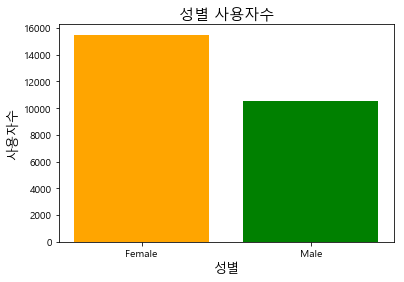

In [19]:
# 성별 사용자수를 bar 그래프로 그려보세요


plt.bar( ##여기에 코드를 채우세요.## )
plt.title('성별 사용자수',fontsize=15)
plt.xlabel('성별',fontsize=13)
plt.ylabel('사용자수',fontsize=13)
plt.show()

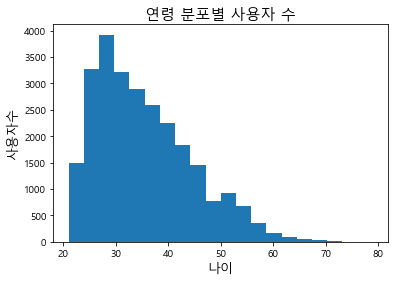

In [20]:
# histogram을 사용해 연령 분포별 사용자 수를 그려보세요 (bins=20)

plt.hist(##여기에 코드를 채우세요##)
plt.title('연령 분포별 사용자 수',fontsize=15)
plt.xlabel('나이',fontsize=13)
plt.ylabel('사용자수',fontsize=13)
plt.show()